# Numerical Methods: 1-D Diffusion equation

This notebook demonstrates the concepts of numerically solving equations by working through the derivation of the Crank-Nicolson scheme for the 1-D spherical diffusion equation.

_____

The diffusion equation (1) has many applications for physical processes, we will consider thermal diffusion (conduction).

### $\frac{\partial T}{\partial t} = \kappa\nabla^{2}T \quad(1)$

where T is the temperature, t is time and $\kappa$ is the thermal diffusivity (diffusion constant).

In the 1-D case in spherical coordinates this looks like:

### $\frac{1}{\kappa}\frac{\partial T}{\partial t} = \frac{2}{r}\frac{\partial T}{\partial r} + \frac{\partial^{2}T}{\partial r^{2}} \quad(2)$

with r as radius.

______

To numerically solve this equation we are going to use the Crank-Nicolson method. First we discretise the equation, that is to say that we approximate the gradients with step changes of temperature in time and space. We a grid of nodes in our domain, the positions of which will be where we will solve this equation:

x---------x---------x---------x---------x

$T_{0}$-------$T_{1}$-------$T_{2}$-------$T_{3}$-------$T_{4}$

We could take the gradient at a point to be the difference between the temperature of 2 neighbouring nodes and divided by the distance between them:


### $\frac{dT}{dr} \approx \frac{\Delta T}{\Delta r} = \frac{T_{i+1} - T_{i}}{\Delta r} \quad (3)$

where i is the 'ith' radial point in the domain. 

This isn't quite 2nd order accurate though as this expression for a gradient is more like the gradient inbetween nodes i and i+1. We can write a 'centered difference derivative' as:

### $\frac{dT}{dr}\Big\vert_{i} = \frac{T_{i+1} - T_{i-1}}{2\Delta r} \quad (4)$

which is more correct for the gradient at point i.

The second derivative is simply the the derivative of the first derivative, therefore if we have:

### $\frac{dT}{dr}\Big\vert_{i+0.5} = \frac{T_{i+1} - T_{i}}{\Delta r} \quad and \quad \frac{dT}{dr}\Big\vert_{i-0.5} = \frac{T_{i} - T_{i-1}}{\Delta r}$

### $\frac{\partial^{2}T}{\partial r^{2}} \approx \frac{\frac{dT}{dr}\big\vert_{i+0.5} - \frac{dT}{dr}\big\vert_{i-0.5}}{\Delta r}$

### $\Rightarrow \frac{d^{2}T}{dr^{2}}\big\vert_{i} = \frac{T_{i+1} - 2T_{i} + T_{i-1}}{\Delta r^{2}}  \quad (5)$

Finally we can discretise our time derivative as:

### $\frac{\partial T}{\partial t} \approx \frac{\Delta T}{\Delta t} = \frac{T_{i}^{j+1} - T_{i}^{j}}{\Delta t}  \quad (6)$

where j and j+1 represent the times t and t+$\Delta t$

_________

The Crank-Nicolson scheme says that discretised in this form, it is second order accurate in both space and time and unconditionally numerically stable (but not necessarily accurate):

### $\frac{T_{i}^{j+1} - T_{i}^{j}}{\Delta t} = \frac{1}{2}\left[ F_{i}^{j+1}\left(T,r,\frac{\partial T}{\partial r},\frac{\partial^{2}T}{\partial r^{2}}\right) + F_{i}^{j}\left(T,r,\frac{\partial T}{\partial r},\frac{\partial^{2}T}{\partial r^{2}}\right) \right]$

where F is the discretised function on the RHS of equation (1).

Putting together our expressions for the gradients (equations 4-6) yeild:


#### $T_{i-1}^{j+1}\left[m\left (\frac{\Delta r}{r_{i}} - 1\right)\right] + T_{i}^{j+1}\left [1 + 2m\right] + T_{i+1}^{j+1}\left[m\left (-1 - \frac{\Delta r}{r_{i}}\right)\right] = T_{i-1}^{j}\left[m\left (1 - \frac{\Delta r}{r_{i}}\right)\right] + T_{i}^{j}\left [1 - 2m\right] + T_{i+1}^{j}\left[m\left (1 + \frac{\Delta r}{r_{i}}\right)\right]\quad (7)$

where $m = \frac{\kappa \Delta t}{2\Delta r^{2}}$

If we know an intial temperature profile then we know $T_{i}^{j}$ and want to solve for $T_{i}^{j+1}$. Simplifying the RHS of equation 7:

$b_{i}^{j} = T_{i-1}^{j}\left[m\left (1 - \frac{\Delta r}{r_{i}}\right)\right] + T_{i}^{j}\left [1 - 2m\right] + T_{i+1}^{j}\left[m\left (1 + \frac{\Delta r}{r_{i}}\right)\right] \quad (8)$


we can set out equation 7 a linear equation:

$\Rightarrow
\begin{bmatrix}
m\left (\frac{\Delta r}{r_{i}} - 1\right)    &,   \left (1 + 2m\right)  &,    m\left (-1 - \frac{\Delta r}{r_{i}}\right)
\end{bmatrix}
\begin{bmatrix}
T_{i-1}^{j+1} \\
T_{i}^{j+1} \\
T_{i+1}^{j+1}
\end{bmatrix}
= b_{i}^{j} \quad (9)$

______

Here we only have 1 equation and 3 unknowns and so this cannot be solved. Noticing that if i=3 the $T_{3}$ will appear as $T_{i}$ in this equation and as $T_{i-1}$ in the equation when i=4, you can use this overlap to form a series of linear equations:

#### $\begin{bmatrix}
1 & , 0 & ,0 &  ... &,0 &, 0\\
m\left (\frac{\Delta r}{r_{i}} - 1\right)    &,   \left (1 + 2m\right)  &,    m\left (-1 - \frac{\Delta r}{r_{i}}\right) & ... &,0 &, 0\\
0 &, m\left (\frac{\Delta r}{r_{i}} - 1\right)    &,   \left (1 + 2m\right) &  ... &,0 &, 0\\
: & : & : &  : & : & :\\
0 &, 0 &, 0 & , ... &,   \left (1 + 2m\right)  &,    m\left (-1 - \frac{\Delta r}{r_{i}}\right)\\
0 &, 0 &, 0 & ... & , 0 & ,1\\
\end{bmatrix}
\begin{bmatrix}
T_{0}^{j+1} \\
T_{1}^{j+1} \\
T_{2}^{j+1}\\
:\\
T_{n-1}^{j+1}\\
T_{n}^{j+1}\\
\end{bmatrix}
=
\begin{bmatrix}
T_{0}^{j}\\
b_{1}^{j}\\
b_{2}^{j}\\
:\\
b_{n-1}^{j}\\
T_{n}^{j}\\
\end{bmatrix}
\quad (10)$

where n is the largest radial index on the grid.

Notice that to make sure we are able to solve this we need 2 boundary conditions, which in this case are fixed temperature values at $T_{0}$ and $T_{n}$ making the first and last equation trivial to solve. There are then n-1 unknowns inbetween them with n-1 distinct equations. The vector of temperatures at time step j+1 can now be solved for.

_________

We may not want to fix the temperature in our boundary condition and instead fix the gradient. This poses a problem as our expression for the centered difference derivative (equation 4) requires the temperature at a position i-1, outside of our grid when i=0 on the boundary. 


We get around this with 'ghost points': an imaginary point a distance $\Delta r$ outside of our domain with a temperature $T_{-1}$. We can then say:

#### $\frac{dT}{dr} \Big\vert_{r_{0}} \approx \frac{T_{1}-T_{-1}}{2\Delta r} = q_{0} \quad \Rightarrow T_{-1} = T_{1} - 2q_{0}\Delta r \quad (11)$

where $q_{0}$ is the specified temperature gradient boundary condition. This gives us an expression for the ghost point temperature ($T_{-1}$) that when subbed into equation 7 (when i=0) allows us to eliminate this imaginary temperature at point i=-1. This changes our form for the first and last equation such that the new matrix is:


$\begin{bmatrix}
(1+2m) & , -2m & ,0 &, 0 & ... &, 0\\
m\left (\frac{\Delta r}{r_{1}} - 1\right)    &,   \left (1 + 2m\right)  &,    m\left (-1 - \frac{\Delta r}{r_{1}}\right) & ,0 & ... &, 0\\
0 &, m\left (\frac{\Delta r}{r_{2}} - 1\right)    &,   \left (1 + 2m\right)   &  m\left (-1 - \frac{\Delta r}{r_{2}}\right)  & ... &, 0\\
: & : & : &  : & : & :\\
0 &, 0& , 0 & ... & \left (1 + 2m\right)  &,    m\left (-1 - \frac{\Delta r}{r_{n-1}}\right)\\
0 &, 0 &, 0 & ... &, -2m &, (1+2m)\\
\end{bmatrix}
\begin{bmatrix}
T_{0}^{j+1}\\
T_{1}^{j+1}\\
T_{2}^{j+1}\\
:\\
T_{n-1}^{j+1}\\
T_{n}^{j+1}\\
\end{bmatrix}
=
\begin{bmatrix}
f_{1}^{j}\\
b_{1}^{j}\\
b_{2}^{j}\\
:\\
b_{n-1}\\
f_{2}^{j}\\
\end{bmatrix}
\quad (11)$

where $f_{1}^{j} = (1-2m)T_{0}^{j} + (2m)T_{1}^{j} + 4q_{0}^{j}m\Delta r \left(\frac{\Delta r}{r_{0}} -1\right)$

and $f_{2}^{j} = (2m)T_{n-1}^{j} + (1-2m)T_{n}^{j} + 4q_{n}^{j}m\Delta r \left(1 + \frac{\Delta r}{r_{n}}\right)$

________

Some aspects to notice about this particular case when we are working in spherical coordinates. Because of the terms $\frac{\Delta r}{r_{i}} - 1$ that appear in the matrix this cannot be evaluated at r=0. Furthermore if $r_{i}=\Delta r$ then $\frac{\Delta r}{r_{i}} - 1 = 0$. For the fixed gradient boundary conditions this means the prescribed value of $q_{0}^{j}$ would always be multiplied by 0 and so would have no impact on the solution.

The expressions for other coordinate systems and even more dimensions are derived by the same arguments taken here and a wealth of information on them is available. Below is a python code that solves the above problem with either fixed temperature of fixed gradient boundary conditions. The time steps are adjusted dynamically such that $m = \frac{\kappa \Delta t}{2\Delta r^{2}} \leq 0.5$ This ensures the result is stable.

_____

In [34]:
#############################################################################
def diffusion(X,r,t_tot,lb,ub,D,gp1,gp2):

    #Define m for given dt,D and dr.
    dt = t_tot
    dr = r[1]-r[0]
    m = D*dt/(2*dr**2)
    n = 1
    tolerance = 0.4

    #Repeat calculation at a smaller dt if necessary to ensure accuracy
    if m >= 0.5:
        n = int(np.ceil(m/tolerance))
        dt = dt/n
        m = m/n

    A = LHS_lin_eq(r,dr,m,gp1,gp2)

    #Solve the linear equations
    for i in range(n):

        B = RHS_lin_eq(X,r,dr,m,gp1,gp2,lb,ub)
        X = np.linalg.solve(A,B)

    return X
###############################################################################
def RHS_lin_eq(X,r,dr,m,gp1,gp2,lb,ub):
    #Set up linear algebra equations in the form Ax=B
    
    
    size = r.size
    B = np.zeros(size)
    
    for i in range(1,size-1):
        B[i] = m*(1 - dr/r[i])*X[i-1] + (1-2*m)*X[i] + m*(1 + dr/r[i])*X[i+1]
    
    if gp1 == 1:
        B[0]=(1-2*m)*X[0] + 2*m*X[1] + 2*m*dr*(lb+lb)*(dr/r[0] - 1)
    else:
        B[0] = lb
    
    if gp2 == 1:
        B[-1]=(2*m)*X[-2] + (1-2*m)*X[-1] + 2*m*dr*(ub+ub)*(1+ dr/r[-1])
    else:
        B[-1] = ub

    return B  
###############################################################################
def LHS_lin_eq(r,dr,m,gp1,gp2):
    #Set up linear algebra equations in the form Ax=B
    
    size = r.size
    A = np.zeros([size,size])
    
    for i in range(1,size-1):
        A[i,i] = (1+2*m)

        A[i,i-1] = m*(dr/r[i] - 1)

        A[i,i+1] = m*(-1 -dr/r[i])
    
    
    if gp1 == 1:
        A[0,1] = -2*m
        A[0,0] = (1+2*m)
    elif gp1 == 0:
        A[0,0] = 1
      
    if gp2 == 1:
        A[-1,-2] = -2*m
        A[-1,-1] = (1+2*m)
    elif gp2 == 0:
        A[-1,-1] = 1

    return A
###############################################################################

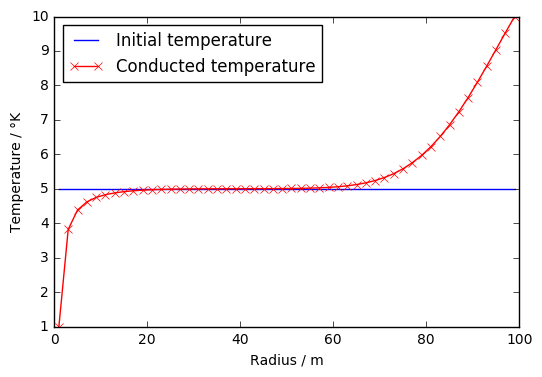

In [35]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

#model parameter
r0 = 1         #Lower radius
rn = 100       #Upper radius
kappa = 1e-5   #Thermal diffusivity (m^2/s)
dr = 2         #dr (m)
dt = 1e7       #dt (s)
lb = 1         #lower boundary value
ub = 10        #upper boundary value
gp1 = 0        #lower boundary condition type; 1=gradient, 0=fixed value
gp2 = 0        #upper boundary condition type; 1=gradient, 0=fixed value


#Define radial grid
r = np.arange(r0,rn,dr)

#Inital adiabatic temperature
T_in = np.ones(r.size)*5

T = diffusion(T_in,r,dt,lb,ub,kappa,gp1,gp2)

plt.plot(r,T_in)
plt.plot(r,T,'rx-')
plt.xlabel('Radius / m')
plt.ylabel('Temperature / \N{DEGREE SIGN}K')
plt.legend(['Initial temperature','Conducted temperature'],loc=0)
plt.show()
